REGIONES CONECTIVIDAD Y FRONTERAS

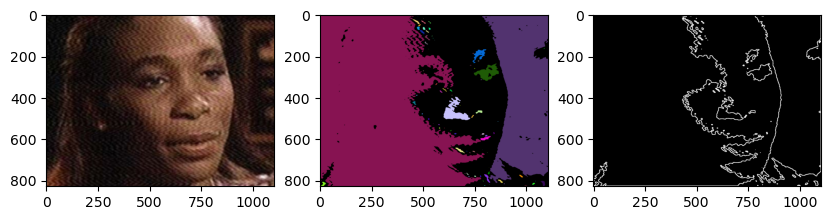

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
path='../imagenes/dist.jpg'

imagen= cv2.imread(path)

gray= cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0)
_,binarizado=cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#regiones

cant,region=cv2.connectedComponents(binarizado)
colores=np.random.randint(0,255,size=(cant,3),dtype=np.uint8)
colores[0]=[0,0,0]
color_reg=colores[region]

#fronteras
contorno,_=cv2.findContours(binarizado,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
lineas=cv2.drawContours(np.zeros_like(gray),contorno,-1,255,2)

plt.figure(figsize=(10,5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(color_reg)

plt.subplot(133)
plt.imshow(lineas,cmap='gray')

Distancia

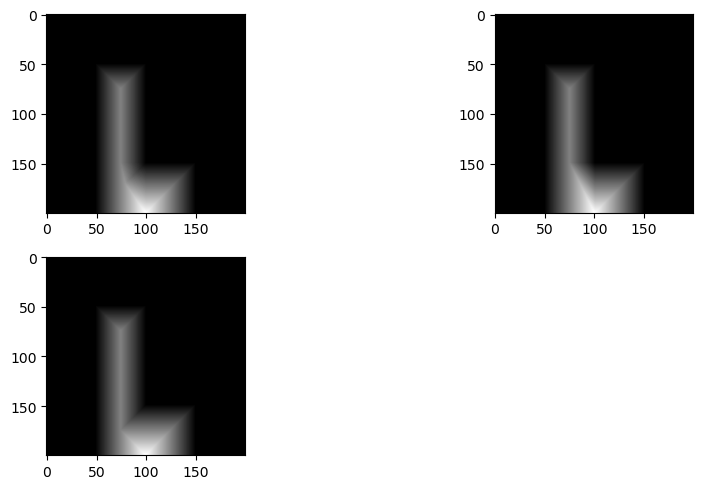

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img=np.zeros((200,200),dtype=np.uint8)
img[50:150,50:100]=1
img[150:200,50:150]=1

def distancia(img_binarizada):
    invertir=1-img_binarizada

    #eucladiana
    dist_eucli=cv2.distanceTransform(img_binarizada,cv2.DIST_L2,3)
    #CITYBLOCK
    dist_city= cv2.distanceTransform(img_binarizada,cv2.DIST_L1,3)
    #CHEASSBOAR
    dist_chess= cv2.distanceTransform(img_binarizada,cv2.DIST_C,3)
    return dist_eucli,dist_city,dist_chess

eucl,city,chess=distancia(img)

def normalizar(dis):
    return cv2.normalize(dis,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)

normecl= normalizar(eucl) 
normcity= normalizar(city)
normchess =normalizar(chess)

plt.figure(figsize=(10,5))

plt.subplot(221)
plt.imshow(img,cmap='gray')

plt.subplot(222)
plt.imshow(normecl,cmap='gray')

plt.subplot(223)
plt.imshow(normcity,cmap='gray')

plt.subplot(224)
plt.imshow(normchess,cmap='gray')

plt.tight_layout()
plt.show()

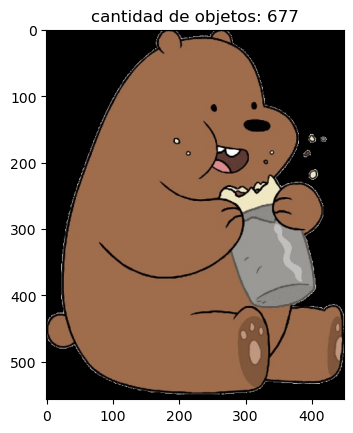

In [4]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

#conda activate "entorno_pdi"
#conda install scikit-image

def contar(imagen):
    gray=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    _,bianrizar=cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    etiquetar=measure.label(bianrizar,connectivity=2)#conectividad con 4 == 2 y conectividad de 8 == 1
    num=np.max(etiquetar)
    return num

path='../imagenes/pardoOriginal.png'

imagen=cv2.imread(path)
contarr=contar(imagen)

plt.imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
plt.title(f'cantidad de objetos: {contarr}')
plt.show()